from pycaret.classification import *
import pandas as pd

# 1. Load data

In [6]:
data = pd.read_csv('winequality-red.csv', sep=';')

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 2. Initialize Setup

In [8]:
clf1 = setup(data, target = 'quality', session_id=123, log_experiment=True, experiment_name='winequality-red')

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2021/06/29 14:50:37 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



# 3. Compare Baseline

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7131,0.6912,0.3790,0.6828,0.6900,0.5325,0.5385,0.2100
rf,Random Forest Classifier,0.6944,0.6802,0.3728,0.6604,0.6727,0.5041,0.5085,0.3170
lightgbm,Light Gradient Boosting Machine,0.6801,0.6693,0.3659,0.6488,0.6599,0.4815,0.4852,0.6080
xgboost,Extreme Gradient Boosting,0.6729,0.6702,0.3638,0.6427,0.6546,0.4731,0.4758,1.4910
gbc,Gradient Boosting Classifier,0.6470,0.6464,0.3447,0.6271,0.6335,0.4360,0.4382,0.8400
lr,Logistic Regression,0.6050,0.6083,0.2826,0.5773,0.5758,0.3463,0.3521,1.3300
dt,Decision Tree Classifier,0.5951,0.5481,0.3664,0.5958,0.5905,0.3728,0.3760,0.0470
lda,Linear Discriminant Analysis,0.5907,0.6131,0.3226,0.5689,0.5765,0.3465,0.3485,0.0450
ridge,Ridge Classifier,0.5844,0.0000,0.2454,0.4808,0.5268,0.2950,0.3062,0.0470
ada,Ada Boost Classifier,0.5736,0.4601,0.2409,0.4868,0.5233,0.2817,0.2947,0.1070


# 4. Create Model

In [10]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0.8892,0.3468,0.7054,0.7096,0.5675,0.5766
1,0.7054,0.0000,0.3794,0.6864,0.6736,0.5103,0.5215
2,0.7411,0.0000,0.5460,0.7369,0.7338,0.5857,0.5880
3,0.7143,0.8581,0.3394,0.6789,0.6888,0.5314,0.5371
4,0.7054,0.8503,0.3112,0.6590,0.6723,0.5155,0.5263
5,0.7500,0.8801,0.3789,0.7238,0.7325,0.5959,0.5999
6,0.7500,0.8838,0.5170,0.7153,0.7272,0.5943,0.5994
7,0.6696,0.8495,0.2962,0.6263,0.6382,0.4565,0.4626
8,0.6786,0.8564,0.3250,0.6432,0.6555,0.4752,0.4797
9,0.6847,0.8446,0.3496,0.6532,0.6684,0.4927,0.4938


# 5. Tune Hyperparameters

In [15]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.7983,0.2821,0.6366,0.5993,0.3868,0.3963
1,0.5804,0.0000,0.2826,0.4881,0.5298,0.2938,0.3030
2,0.5982,0.0000,0.3410,0.6004,0.5773,0.3326,0.3387
3,0.5893,0.7775,0.2468,0.5472,0.5438,0.3086,0.3175
4,0.6518,0.8061,0.2645,0.5438,0.5905,0.4100,0.4285
5,0.6250,0.8112,0.2861,0.5858,0.5966,0.3818,0.3871
6,0.6607,0.8127,0.3009,0.6379,0.6308,0.4364,0.4443
7,0.6071,0.7629,0.2709,0.5782,0.5779,0.3479,0.3548
8,0.6071,0.7741,0.2708,0.5613,0.5772,0.3525,0.3572
9,0.5225,0.7449,0.2257,0.5082,0.4887,0.1936,0.1996


# 6. Analyze Model

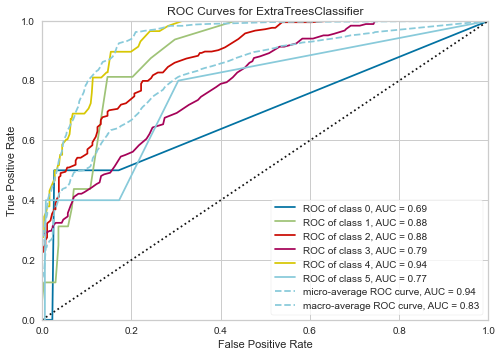

In [17]:
plot_model(et)

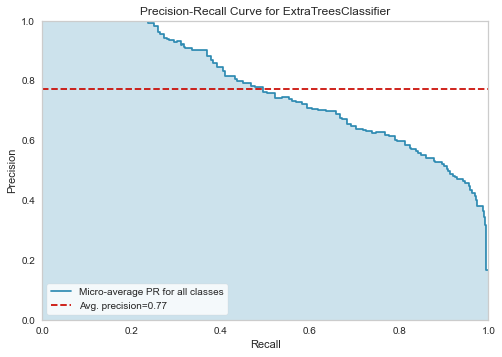

In [21]:
plot_model(et, plot = 'pr')

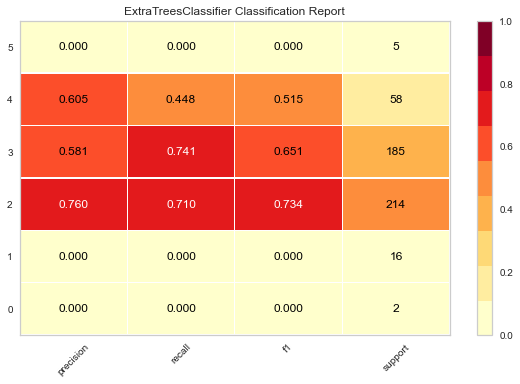

In [22]:
plot_model(et, plot = 'class_report')

# 10. Interpret Model

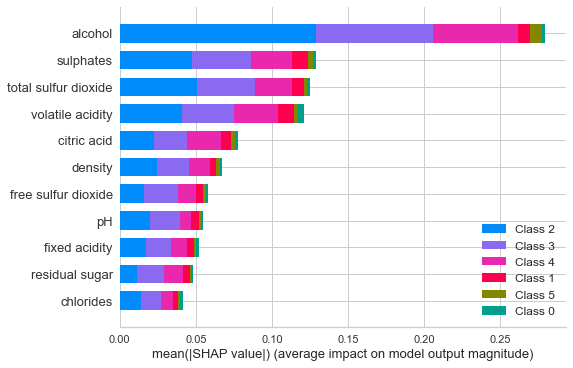

In [27]:
interpret_model(et)

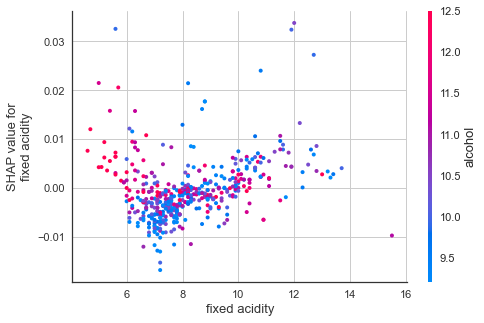

In [28]:
interpret_model(et, plot = 'correlation')

In [38]:
interpret_model(et, plot = 'reason', observation = 12)

# 11. AutoML()

In [29]:
best = automl(optimize = 'Recall')
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# 12. Predict Model

In [30]:
pred_holdouts = predict_model(et)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6562,0.8494,0.3165,0.6356,0.6404,0.4400,0.4457


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6,6,0.40
1,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5,5,0.98
2,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5,5,0.53
3,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6,7,0.41
4,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,5,5,0.52


In [40]:
new_data = data.copy()
new_data.drop(['quality'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,Score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


# 13. Save / Load Model

In [33]:
save_model(best, model_name='best-model')
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                    

In [34]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='quality', time_features=[])

In [35]:
from sklearn import set_config
set_config(display='text')